Importing necessary libraries

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="white")


In [4]:
#define working directory
os.chdir('C:/Users/hp/Desktop/Trial')

In [5]:
#import dataset
customer=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

.head()- used to return top 5 ( by default) rows of a data frame or series.

In [6]:
customer.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


.info() function is used to get a concise summary of the dataframe.


In [7]:
customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

drop column : To remove a pariticular column.

In [8]:
drop_column=['Partner']
customer=customer.drop(drop_column,axis=1)

In [9]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


.shape : Returns tuple of shape (Rows, columns) of dataframe/series.

In [10]:
customer.shape

(7043, 20)

.describe() : used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. When this method is applied to a series of string, it returns a different output which is shown in the examples below.

In [11]:
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
customer.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
customer.mean(axis=0)

SeniorCitizen      0.162147
tenure            32.371149
MonthlyCharges    64.761692
dtype: float64

In [14]:
customer.mean(axis=1)

0       10.283333
1       30.316667
2       18.616667
3       29.100000
4       24.233333
5       35.883333
6       37.033333
7       13.250000
8       44.266667
9       39.383333
10      20.983333
11      11.650000
12      52.783333
13      50.900000
14      43.500000
15      60.750000
16      24.216667
17      59.233333
18      21.733333
19      37.016667
20      13.883333
21      10.600000
22       7.050000
23      39.300000
24      36.200000
25      28.433333
26      48.783333
27      10.400000
28      54.083333
29      27.233333
          ...    
7013    44.466667
7014    43.400000
7015    40.066667
7016    16.983333
7017    23.883333
7018    23.883333
7019    19.716667
7020    10.400000
7021    23.933333
7022    58.983333
7023    55.833333
7024    42.933333
7025    37.683333
7026    17.733333
7027    28.783333
7028    44.033333
7029    17.133333
7030     7.350000
7031    38.666667
7032    25.916667
7033    35.833333
7034    56.650000
7035    32.566667
7036    24.216667
7037    31

In [15]:
customer=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

.unique() : to see the unique values in a particular column.

In [16]:
customer.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

value_counts() : This function returns object containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

In [17]:
customer.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
64     80
56     80
16     80
     ... 
20     71
62     70
41     70
53     70
32     69
54     68
47     68
50     68
51     68
58     67
49     66
43     65
42     65
31     65
34     65
37     65
57     65
55     64
40     64
48     64
33     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [18]:
customer.index

RangeIndex(start=0, stop=7043, step=1)

In [19]:
customer.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
customer.to_numpy()


array([['7590-VHVEG', 'Female', 0, ..., 29.85, '29.85', 'No'],
       ['5575-GNVDE', 'Male', 0, ..., 56.95, '1889.5', 'No'],
       ['3668-QPYBK', 'Male', 0, ..., 53.85, '108.15', 'Yes'],
       ...,
       ['4801-JZAZL', 'Female', 0, ..., 29.6, '346.45', 'No'],
       ['8361-LTMKD', 'Male', 1, ..., 74.4, '306.6', 'Yes'],
       ['3186-AJIEK', 'Male', 0, ..., 105.65, '6844.5', 'No']],
      dtype=object)

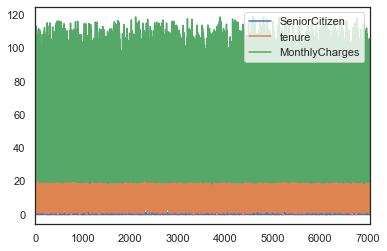

In [21]:
customer.plot()

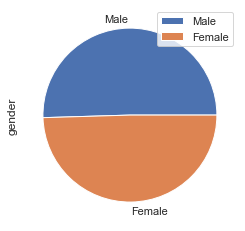

In [22]:
customer_gender= pd.DataFrame(customer['gender'].value_counts())
customer_gender.columns=['gender']
customer_gender.plot(kind='pie', y='gender')

The graph below shows the percentage of senior citizens in the given data and also shows us the  senior citizen churn percentage.

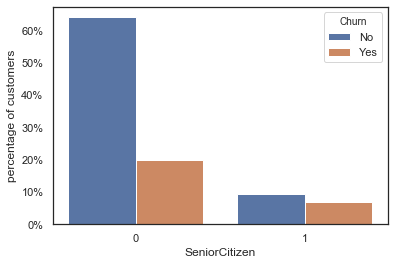

In [23]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = customer.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(customer)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

In [24]:
customer.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


idxmax(): This function returns index of first occurrence of maximum over requested axis. While finding the index of the maximum value across any index, all NA/null values are excluded.

In [25]:
top=customer['tenure'].head().idxmax()
top_obs=pd.DataFrame(customer.loc[top]);
top_obs


,3
customerID,7795-CFOCW
gender,Male
SeniorCitizen,0
Partner,No
Dependents,No
tenure,45
PhoneService,No
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,Yes


In [26]:
top=customer['tenure'].idxmax()
top_obs=pd.DataFrame(customer.loc[top]);
top_obs


,28
customerID,5248-YGIJN
gender,Male
SeniorCitizen,0
Partner,Yes
Dependents,No
tenure,72
PhoneService,Yes
MultipleLines,Yes
InternetService,DSL
OnlineSecurity,Yes


In [27]:
customer['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Filtering out the records based on two conditions using the AND (&) operator.

count_sen : Senior Citizen + Churn
noncount_sen : Senior Citizen + NotChurn

In [28]:
count_sen=customer[(customer['SeniorCitizen']==1)& (customer['Churn']=='Yes')]
count_sen

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
53,7495-OOKFY,Female,1,Yes,No,8,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.65,633.3,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
99,4598-XLKNJ,Female,1,Yes,No,25,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.50,2514.5,Yes
113,4846-WHAFZ,Female,1,Yes,No,37,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.50,2868.15,Yes
126,4412-YLTKF,Female,1,No,No,27,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,78.05,2135.5,Yes
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
168,3445-HXXGF,Male,1,Yes,No,58,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,45.30,2651.2,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
177,2070-FNEXE,Female,1,No,No,7,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),76.45,503.6,Yes


In [29]:
count_sen.shape

(476, 21)

In [30]:
drop_column=['Partner']
count_sen=count_sen.drop(drop_column,axis=1)

In [31]:
count_sen

,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
53,7495-OOKFY,Female,1,No,8,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.65,633.3,Yes
55,1658-BYGOY,Male,1,No,18,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
99,4598-XLKNJ,Female,1,No,25,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.50,2514.5,Yes
113,4846-WHAFZ,Female,1,No,37,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.50,2868.15,Yes
126,4412-YLTKF,Female,1,No,27,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,78.05,2135.5,Yes
139,0390-DCFDQ,Female,1,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
168,3445-HXXGF,Male,1,No,58,No,No phone service,DSL,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,45.30,2651.2,Yes
176,2656-FMOKZ,Female,1,No,15,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
177,2070-FNEXE,Female,1,No,7,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),76.45,503.6,Yes


From the data it can be asumed that lack of Online Security can be one of the reason for the senior citizens to discontinue the service. 
Total no. of senior citizens = 1142
Total no. of senior citizens who discontinued the service = 476
Total no. of senior citizen who discontinued the service and have no online security = 407 (ie. 85%)



In [32]:
count_sen[(count_sen['OnlineSecurity']=="No")].shape

(407, 20)

In [33]:
notcount_sen=customer[(customer['SeniorCitizen']==1)& (customer['Churn']=='No')]
notcount_sen

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
52,6575-SUVOI,Female,1,Yes,No,25,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),69.50,1752.65,No
54,4667-QONEA,Female,1,Yes,Yes,60,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),74.85,4456.35,No
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
72,1891-QRQSA,Male,1,Yes,Yes,64,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),111.60,7099,No
75,2673-CXQEU,Female,1,No,No,56,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,110.50,6139.5,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No


In [34]:
notcount_sen[(notcount_sen['OnlineSecurity']=="Yes")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
52,6575-SUVOI,Female,1,Yes,No,25,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),69.50,1752.65,No
54,4667-QONEA,Female,1,Yes,Yes,60,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),74.85,4456.35,No
72,1891-QRQSA,Male,1,Yes,Yes,64,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),111.60,7099,No
75,2673-CXQEU,Female,1,No,No,56,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,110.50,6139.5,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
129,2639-UGMAZ,Male,1,No,No,71,No,No phone service,DSL,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,56.45,3985.35,No
140,3146-MSEGF,Female,1,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),88.05,6425.65,No
243,9058-HRZSV,Female,1,Yes,No,65,Yes,No,Fiber optic,Yes,...,Yes,No,No,Yes,Month-to-month,No,Electronic check,94.40,6126.15,No
245,0221-WMXNQ,Male,1,No,No,4,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,75.35,273.4,No


In the following cells I have taken some columns (Dependents,PhoneService,InternetService,MultipleLines,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV) to compare the data for senior citizens who have  continued and discontinued with the service.

Following are some of the graphs used to visualise the columns of the given dataset to give a pictorial representation of the dataset for much simpler, easier and more user-friendly understanding !

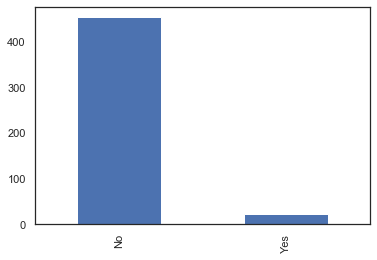

In [35]:
count_sen['Dependents'].value_counts().plot(kind='bar')


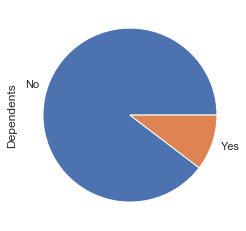

In [36]:
notcount_sen['Dependents'].value_counts().plot(kind="pie")

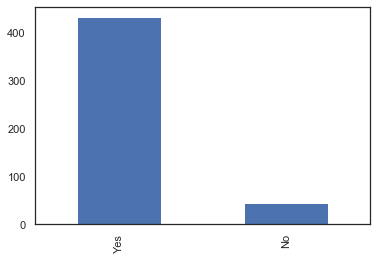

In [37]:
count_sen['PhoneService'].value_counts().plot(kind="bar")

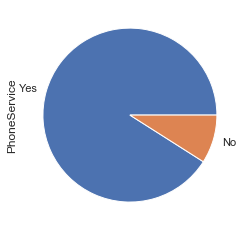

In [38]:
notcount_sen['PhoneService'].value_counts().plot(kind="pie")

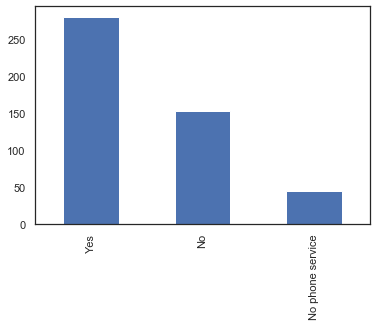

In [39]:
count_sen['MultipleLines'].value_counts().plot(kind="bar")

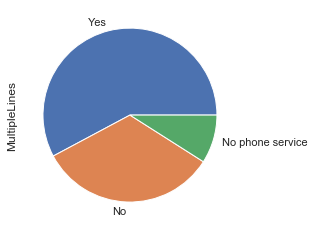

In [40]:
notcount_sen['MultipleLines'].value_counts().plot(kind="pie")

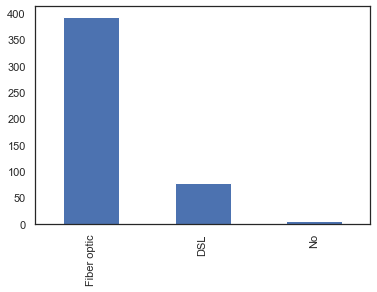

In [41]:
count_sen['InternetService'].value_counts().plot(kind="bar")

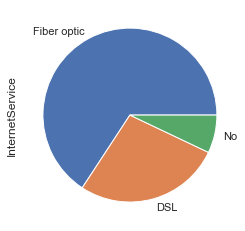

In [42]:
notcount_sen['InternetService'].value_counts().plot(kind="pie")

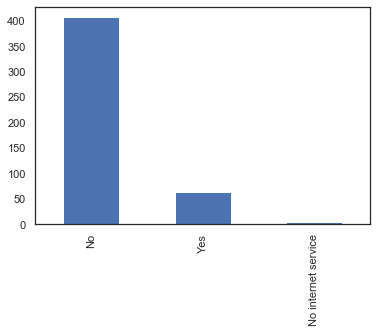

In [43]:
count_sen['OnlineSecurity'].value_counts().plot(kind="bar")

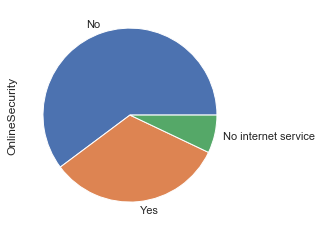

In [44]:
notcount_sen['OnlineSecurity'].value_counts().plot(kind="pie")

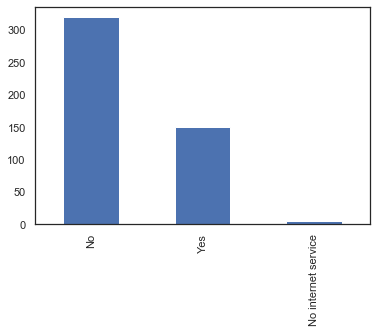

In [45]:
count_sen['DeviceProtection'].value_counts().plot(kind="bar")

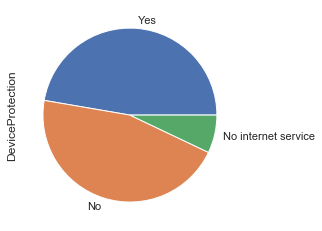

In [46]:
notcount_sen['DeviceProtection'].value_counts().plot(kind="pie")

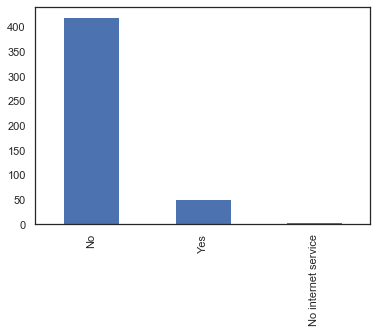

In [47]:
count_sen['TechSupport'].value_counts().plot(kind="bar")

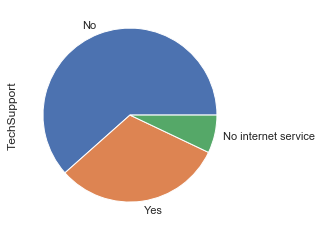

In [48]:
notcount_sen['TechSupport'].value_counts().plot(kind="pie")

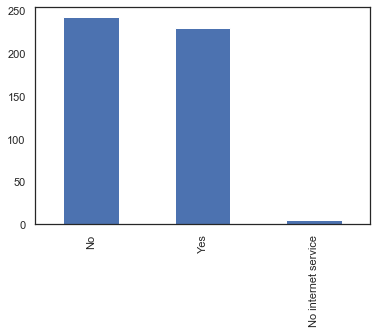

In [49]:
count_sen['StreamingTV'].value_counts().plot(kind="bar")

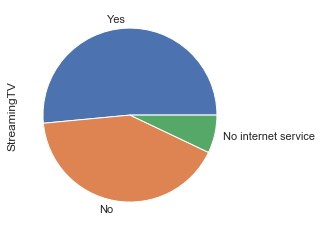

In [50]:
notcount_sen['StreamingTV'].value_counts().plot(kind="pie")